<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2021 Reduction Exercise: Part 1</h2>

The goal of our reduction will be to complete the following steps:
1. make a master bias frame by combining all of our individual bias frames;
2. subtract this frame from all of the individual dark, science, and twilight flat frames;
3. combine your bias subtracted dark frames;
4. subtract the dark frame from each of your science and flat field images;
5. We may trim the images to focus on the centers where the flatfielding is good.
6. make a combined flatfield image in each band;
7. flatfield the individual flatfield images (as a check) and the science images;
8. shift and align all of your science images;
9. combine your science images to obtain a final combined science image.
10. establish the orientation of your images and where exactly they are pointing.

Once this is done we will move onto the next phase, where we measure the brightness of our objects.

In this exercise you will go through and start by viewing all of your dark, bias, and science frames to check for any issues.  You will also access the logs and you will each make your own lists of files of each type.  We will do this for the twilight flats at a later point as they were taken by Dr. Finn after we observed and I need to double check which ones we can use.

<h4> Copy over the images from a public shared drive to <i>your</i> departmental shared disk space </h4>

The department has created space for each of you on its network drive space.  You will store all of your data there so that you can work from any computer.

Text in quotes <> indicates a placeholder value that you will need to fill in.  For example \<KUID> should be your KU ID number.  

The raw data are all stored in the ~/RFSLAB/USER_DPT/_PUBLIC/ASTR596/Fall_2021/Data/2021-10-19/Raw/

Your personal network drive space is at ~/RFSLAB/USER_DPT/\<KUID>

To copy over the data from the public directory to your directory go to your network directory in the command line and:

1. make a directory tree called "ASTR596/Data/2021-10-19/Raw" and cd into that directory.  Note that you will need to make mutliple directories one after the other to make this tree.

2. from within that directory type (without the quotes <i>rsync -u -a -v ~/RFSLAB/USER_DPT/_PUBLIC/ASTR596/Data/2021-10-19/Raw/ .</i>, where there is a space before the final "."

3. Make directories in your personal space called 

~/RFSLAB/USER_DPT/\<KUID>/ASTR596/Data/2021-10-19/Reduced and 

~/RFSLAB/USER_DPT/\<KUID>/ASTR596/Data/2021-10-19/Files 

4. You will need to make lists that contain the different kinds of images.  Open the log file on google docs for 2021-10-19, which is the one night on which we were able to get data. https://docs.google.com/spreadsheets/d/1MPkdAEUSHp2LNUNKNUv27fghJJIgEMv7SAFZ_clElAI/edit#gid=2042569792  

In [1]:
import numpy as np
from astropy import units as u
from astropy.nddata import CCDData
import ccdproc
from matplotlib import pyplot as plt
from ccdproc import Combiner
from astropy.io import ascii

5. Do this for the bias list and the darks that have 180s exposures, as that was the same as for our science frames.

We will also need to do this for the twilight flats in each filter using a list called "flatlist_< filtname>", where filename shoudl be *g* or *r*.  *We will come back to this later once we find out from Dr. Finn which twilight flats were actually good.*



In [2]:
# this is a list of all the bias image names 
# you will need to complete my list
#********************
biaslist = np.array(["b033.fit"])
for x in range(34,54):
    y = "b0" + str(x) + ".fit"
    y = np.array([y])
    biaslist = np.concatenate([biaslist,y])
biaslist

array(['b033.fit', 'b034.fit', 'b035.fit', 'b036.fit', 'b037.fit',
       'b038.fit', 'b039.fit', 'b040.fit', 'b041.fit', 'b042.fit',
       'b043.fit', 'b044.fit', 'b045.fit', 'b046.fit', 'b047.fit',
       'b048.fit', 'b049.fit', 'b050.fit', 'b051.fit', 'b052.fit',
       'b053.fit'], dtype='<U8')

In [3]:
#this is a list of all the dark images that were of the same exposure as our science images
# you will need to complete my list
#*************
darklist_180s = np.array(["d001.fit"])
for x in range(2,10):
    y = "d00" + str(x) + ".fit"
    y = np.array([y])
    darklist_180s = np.concatenate([darklist_180s,y])
for x in range(10,15):
    y = "d0" + str(x) + ".fit"
    y = np.array([y])
    darklist_180s = np.concatenate([darklist_180s,y])
darklist_180s

array(['d001.fit', 'd002.fit', 'd003.fit', 'd004.fit', 'd005.fit',
       'd006.fit', 'd007.fit', 'd008.fit', 'd009.fit', 'd010.fit',
       'd011.fit', 'd012.fit', 'd013.fit', 'd014.fit'], dtype='<U8')

In [4]:
#this is a list of all the flatfield images.  There may need to be more than one list.
####We will have to fill this in later once we clarify which flatfield files actually worked well.  
####You can ignore it for now
#*************
flatlist_g = np.array(["skyflat_g.001.fit"])
for x in range(2,8):
    y = "skyflat_g.00" + str(x) + ".fit"
    y = np.array([y])
    flatlist_g = np.concatenate([flatlist_g,y])
flatlist_r = np.array(["skyflat_r.001.fit"])
for x in range(2,10):
    y = "skyflat_g.00" + str(x) + ".fit"
    y = np.array([y])
    flatlist_r = np.concatenate([flatlist_r,y])
for x in range(10,15):
    y = "skyflat_g.0" + str(x) + ".fit"
    y = np.array([y])
    flatlist_r = np.concatenate([flatlist_r,y])

6. Repeat for the science frames, where this should only include the frames that you are using for science on your clusters.  These are highlighted in green in the log.  These should be called, e.g. "sciencelist_< filtname>_< cluster name>"

In [5]:
#this is a list of all the science images.  There may need to be more than one list
#*************
sciencelist = np.array(["s009.fit"])
for x in range(10,21):
    y = "s0" + str(x) + ".fit"
    y = np.array([y])
    sciencelist = np.concatenate([sciencelist,y])

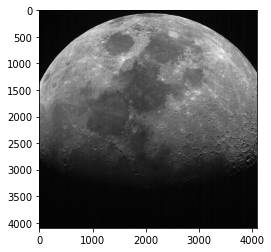

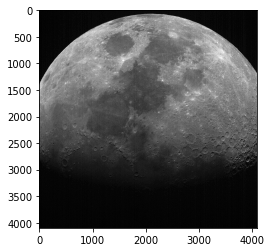

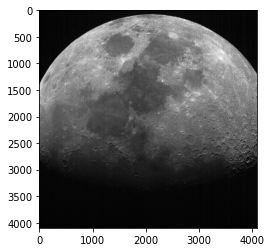

In [6]:
#sorry, couldn't help myself
import os
from astropy.io import fits 
from astropy.utils.data import get_pkg_data_filename
for x in os.listdir("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/moon"):

    stuff = fits.open("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/moon/" + x, encoding="bytes")
    #print(stuff.info())
    image_file = get_pkg_data_filename("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/moon/" + x)
    image_data = fits.getdata(image_file)
    #print(len(image_data[0]))
    plt.figure()
    plt.imshow(image_data,cmap='Greys_r',interpolation='none')
    
    plt.savefig('moon'+x[15],dpi=2000)

7. open ds9 and one after the other display the images in the lists above, which is fewer than the actual number of images you took in a night, and examine them to make sure that there is nothing wrong with them, e.g. satellite trails, very elongated stars.  Make a list that contains any bad images there.  *Ask me if you are unsure what a bad image is.*

Then use the code below to trim the bad images from each of your lists.

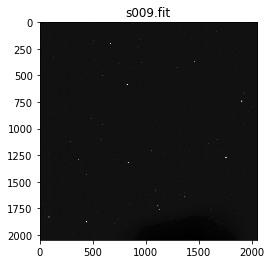

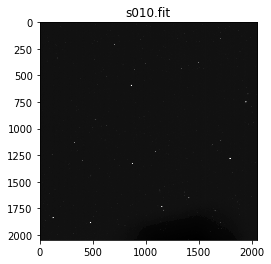

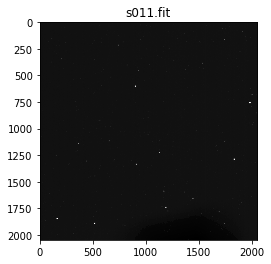

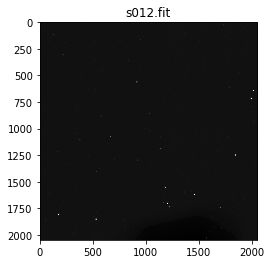

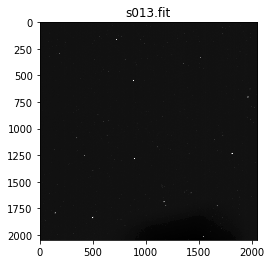

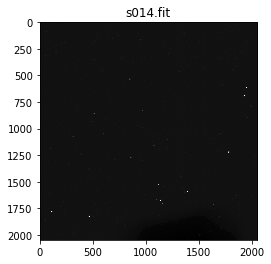

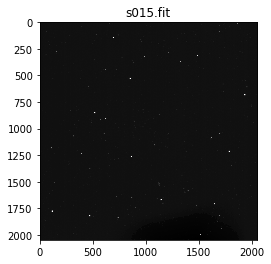

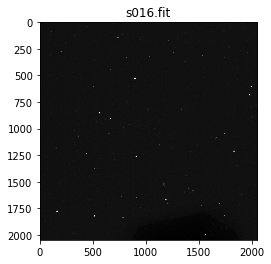

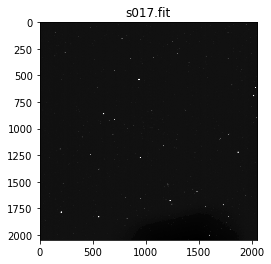

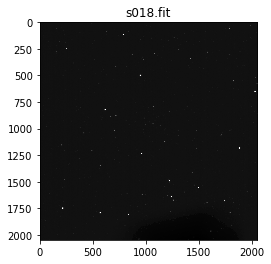

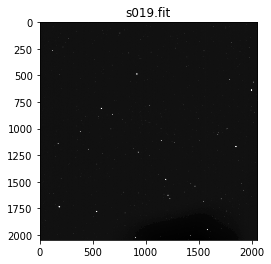

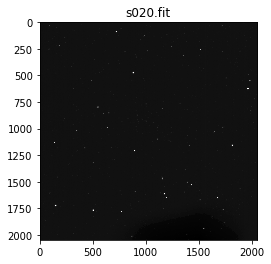

In [7]:
#I just change the folder I'm looking at to look at all the images from each group 
#so I have bias,darklist,flatsg,flatsr,and science 
for x in os.listdir("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/science"):

    stuff = fits.open("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/science/" + x, encoding="bytes")
    #print(stuff.info())
    image_file = get_pkg_data_filename("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/science/" + x)
    image_data = fits.getdata(image_file)
    #print(len(image_data[0]))
    plt.figure()
    plt.title(x)
    plt.imshow(image_data,cmap='Greys_r',interpolation='none')

In [8]:
#define a function that takes an array of image names and an array of bad images and 
#returns a list of images that were not in the bad list
def imlist_clean(imlist, badlist):

    #updated versions of your image list that excludes these bad images
    #this intializes it
    goodimlist = np.array([]) 

    #this loops through every element in badlist
    for i in range(len(imlist)): 
    
        #see if that element of imlist exists in the list of bad images.
        #ibad is an array of indices of the array badlist that match the element of imlist
        ibad = np.where(badlist == imlist[i]) 

        #this is just to reformat ibad, which is output by where as a 2D array, where the 
        #first element is the one we want
        ibad = ibad[0]  

        #this tests if there was a match with badlist.  If there was not, then append
        #the good image names to the good image list
        if ibad.size==0: 
            goodimlist = np.append(goodimlist,imlist[i]) 

    #return something from the routine
    return(goodimlist)


In [9]:
#a list of bad images
#bias-all look okay

#dark- 12,13,14

#flats_g - all look okay 

#flats_r - 1,4,6

#science - all look okay? 

#*************
biaslist_good = biaslist 

badlist = np.array(["d012.fit","d013.fit","d014.fit"])
darklist_180s_good = imlist_clean(darklist_180s,badlist)
print("darklist_180s_good = ",darklist_180s_good)

flatlist_g_good = flatlist_g

badlist = np.array(["skyflat_r.001.fit","skyflat_r.004.fit","skyflat_r.006.fit"])
flatlist_r_good = imlist_clean(flatlist_r,badlist)
print("flatlist_r_good = ",flatlist_r_good)

sciencelist_good = sciencelist


darklist_180s_good =  ['d001.fit' 'd002.fit' 'd003.fit' 'd004.fit' 'd005.fit' 'd006.fit'
 'd007.fit' 'd008.fit' 'd009.fit' 'd010.fit' 'd011.fit']
flatlist_r_good =  ['skyflat_g.002.fit' 'skyflat_g.003.fit' 'skyflat_g.004.fit'
 'skyflat_g.005.fit' 'skyflat_g.006.fit' 'skyflat_g.007.fit'
 'skyflat_g.008.fit' 'skyflat_g.009.fit' 'skyflat_g.010.fit'
 'skyflat_g.011.fit' 'skyflat_g.012.fit' 'skyflat_g.013.fit'
 'skyflat_g.014.fit']


<h4> Make a combined bias frame </h4>
    
We will be reducing our data using the "ccdproc" package of reduction routines contained in astropy.
    
You will first read in bias images and combine them using the "Combiner" task described at https://ccdproc.readthedocs.io/en/latest/image_combination.html

Make sure to read the section on sigma-clipping, which describes how we generate masks for combining the images and how we eventually combine the images.  

As a first step you will need to take the good lists of objects from above in each category and make a file for each class of objects, e.g. bias, dark, science_\<band>, that contain all the corresponding file names, with one object per line.  You can name the lists what you'd like, e.g. biaslist, but you'll need to make sure that they are in the right places in the program later on.  They should all be put in your 

~/RFSLAB/USER_DPT/\<KUID>/ASTR596/Data/2021-10-19/Files 

directory:
1. biaslist: all of your good trimmed bias frames.  This will be used to make your master bias frame

These will be used later

2. darklist_\<exptime>: all of your dark images of a given exposure time (exptime)
2. flatlist_\<band>: all of the trimmed flatfields corresponding to a given band.  Ignore this for now, but we will need it later.
3. science_\<band>_\<target>: all of the science frames for each target in each band




The readme docs that describe this ccdproc routines are given at: https://ccdproc.readthedocs.io/en/latest/reduction_toolbox.html

Everywhere with a \***** you will need to change the code

In [10]:
#*******
#initialize list of bias frames
bias_imlist = []
path = "C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/bias"
for x in os.listdir(path):
    
    if (x in biaslist_good) == True:
    
        #read that into a CCDData object.  This allows you to specify a unit, which we indicate as "adu"
        im = CCDData.read(path + "/" + x,unit = "adu")

        #make a list of all the CCDData instances of each image
        bias_imlist = bias_imlist + [im]
    else: 
        pass 
bias_imlist

[CCDData([[  42,   36,   35, ...,   63,   56,   63],
          [  40,   41,   47, ...,   51,   52,   55],
          [  66,   54,   64, ...,   63,   60,   67],
          ...,
          [  64,   71,   73, ...,   52,   70,   59],
          [  77,   73,   73, ...,   71,   63,   70],
          [  63,   67,   72, ..., 1015,  408, 1015]]),
 CCDData([[  49,   35,   39, ...,   56,   56,   56],
          [  41,   40,   41, ...,   51,   50,   63],
          [  62,   71,   66, ...,   65,   62,   64],
          ...,
          [  63,   72,   66, ...,   76,   67,   68],
          [  74,   73,   72, ...,   71,   68,   74],
          [  74,   68,   69, ..., 1015, 1419, 1419]]),
 CCDData([[  44,   41,   36, ...,   49,   58,   52],
          [  41,   41,   38, ...,   60,   57,   54],
          [  67,   67,   66, ...,   57,   62,   63],
          ...,
          [  74,   73,   72, ...,   65,   65,   71],
          [  73,   71,   67, ...,   70,   71,   58],
          [  75,   63,   68, ..., 1015,  812, 1824

In [11]:
#Combiner list of all bias images
bias_comb = Combiner(bias_imlist)

#now create masks with sigma clipping algorithm
#This creates a mask for each image that is the size of each image but which has 0 values
#everywhere except those pixels in excess of low_thresh and high_thresh sigma from the median.
#Those pixels get a value of 1
#*************
#given the number of pixels in your image how must you set high_thresh to avoid flagging more than
#one pixel because of expected statistical variations.  Assume the noise is distributed like a Gaussian.
bias_comb.sigma_clipping(low_thresh=3, high_thresh=6 , func=np.ma.median)

#Use these masks to combine the images.  This now becomes your master bias
master_bias = bias_comb.average_combine()

#now write out the master bias
redpath = "C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/red"
masterbiaspath = redpath + '/master_bias.fit'
master_bias.write(masterbiaspath,overwrite=True)


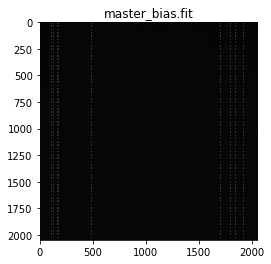

In [12]:
for x in os.listdir("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/red"):

    stuff = fits.open("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/red/" + x, encoding="bytes")
    #print(stuff.info())
    image_file = get_pkg_data_filename("C:/Users/19133/Documents/Obs/My repository/ObservingProject_Student/files/red/" + x)
    image_data = fits.getdata(image_file)
    plt.figure()
    plt.title(x)
    plt.imshow(image_data,cmap='Greys_r',interpolation='none')

**I had a lot of trouble with downloading ds9 because for whatever reason the website was down for a while, but I finally got it. The imshow images show a lot less detail than ds9, so my analysis here is based off the ds9 imaging 

Open your master_bias.fit file with ds9.  In a markup cell below answer the following questions:
1. what is the typical number of counts in this image determined by moving your cursor around the image?

It seems like it's usually around 72 

2. How does this compare with some of the individual bias frames?

It seems about the same, if not a little higher of a value on average than the master bias- the flats are pretty light so I think that might be why? 

3. Comment on what the combined bias frame looks like?

It looks a little lighter in the center, but also shows clear vingetting, and the lines on the sides are still very prominent